# Store Item Demand Forecasting - Time Series Project
-----------------------------------

### Dataset Kaggle - https://www.kaggle.com/c/demand-forecasting-kernels-only/overview


 * Input : 5 year sales data of 10 stores and 50 items
 * Predict : Next 3 month sales for each item and sales (90days x 10stores x 50items) = 45k observations

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

Read the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## Exploring the dataset
---------------------------------------------

In [3]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


#### There are 913000 Data Instances, with no missing data

#### Distibution of Data

<AxesSubplot:xlabel='sales', ylabel='Count'>

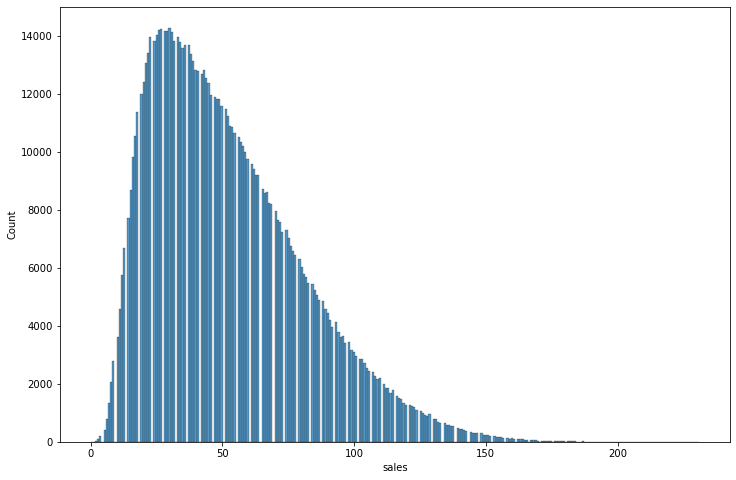

In [5]:
#Sales - Response Variable
sns.histplot(df.sales)

In [6]:
print(df.store.value_counts())

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64


## Preparing the Dataset

#### Converting date to pandas datetime object and using it as index of the dataframe

##### Group the dataset by date so that there is only one observation per day which contains the total sales for all stores and items for that day

In [7]:
df1 = df.groupby('date').sales.sum().reset_index()

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date')
df1

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237
...,...
2017-12-27,20378
2017-12-28,21885
2017-12-29,23535


## Plotting the series

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sales'>

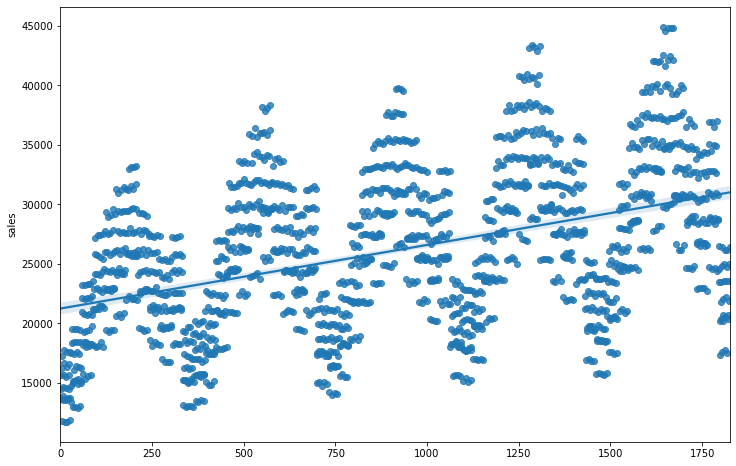

In [44]:
sns.regplot(np.arange(df1.size),df1.sales)

Text(0.5, 1.0, 'December 2014 Aggregate Sales Graph')

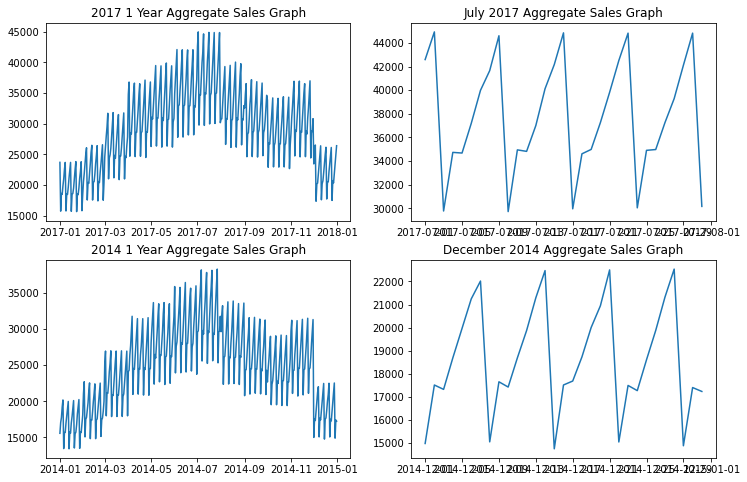

In [10]:
plt.subplot(2,2,1)
plt.plot(df1['2017'])
plt.title('2017 1 Year Aggregate Sales Graph')

plt.subplot(2,2,2)
plt.plot(df1['07-2017'])
plt.title('July 2017 Aggregate Sales Graph')


plt.subplot(2,2,3)
plt.plot(df1['2014'])
plt.title('2014 1 Year Aggregate Sales Graph')

plt.subplot(2,2,4)
plt.plot(df1['12-2014'])
plt.title('December 2014 Aggregate Sales Graph')

#### We can see from the above graphs the data sales series has
####  1. A Positive Trend
####  2. A Yearly Seasonal Pattern where sales increase during June-September Period
####  3. A Weekly Seasonal Pattern where sales increase during the weekends

### Spliting the Dataset into train and test data
--------

#### We will split the data set such that last 90 days will be the validation set and the previous observations will be training data
#### We will be predicting 90 days into future and evalute the model on that basis

In [69]:
train_df = df1[:-90]    #All days except last 90
test_df = df1[-90:]     #Only last 90 days

print(train_df.shape)
print(test_df.shape)

print("Train Data \n",train_df)
print("Test Data \n",test_df)

(1736, 1)
(90, 1)
Train Data 
             sales
date             
2013-01-01  13696
2013-01-02  13678
2013-01-03  14488
2013-01-04  15677
2013-01-05  16237
...           ...
2017-09-28  30535
2017-09-29  32700
2017-09-30  34623
2017-10-01  33845
2017-10-02  22913

[1736 rows x 1 columns]
Test Data 
             sales
date             
2017-10-03  26854
2017-10-04  26691
2017-10-05  28357
2017-10-06  30225
2017-10-07  32189
...           ...
2017-12-27  20378
2017-12-28  21885
2017-12-29  23535
2017-12-30  24988
2017-12-31  26420

[90 rows x 1 columns]
